In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# Importing dataset

In [ ]:
df=pd.read_csv('/content/drive/My Drive/case study fods/master.csv')
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
df.shape

(27820, 12)

27820 rows of data are available

In [ ]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

12 columns to describe the data are available

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [ ]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

The gdp_for_year is given as object type(because of the commas).

In [ ]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


# **Checking for null values**

In [ ]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

*The HDI_for_year contains null values*

In [ ]:
df['HDI for year'].value_counts()

0.888    84
0.772    84
0.713    84
0.830    72
0.793    72
         ..
0.614    12
0.728    12
0.522    12
0.879    12
0.924    12
Name: HDI for year, Length: 305, dtype: int64

*Count of each value in HDI column is determined*

In [ ]:
df=df.fillna(df['HDI for year'].mean())
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.776601,"2,156,624,900",796,Boomers


*The null values are filled with mean of the HDI column*

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df[' gdp_for_year ($) ']=df[' gdp_for_year ($) '].str.replace(',','',regex=True)
df[' gdp_for_year ($) ']=df[' gdp_for_year ($) '].astype(int)
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.776601,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.776601,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.776601,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.776601,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.776601,2156624900,796,Boomers


*Removing commas from the gdp value and converting it into integer values*

# Dropping unwanted columns

In [ ]:
df=df.drop(['country-year'],axis=1)

In [ ]:
df['age']=df['age'].str.replace('years','',regex=True)
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24,21,312900,6.71,Albania1987,0.776601,2156624900,796,Generation X
1,Albania,1987,male,35-54,16,308000,5.19,Albania1987,0.776601,2156624900,796,Silent
2,Albania,1987,female,15-24,14,289700,4.83,Albania1987,0.776601,2156624900,796,Generation X
3,Albania,1987,male,75+,1,21800,4.59,Albania1987,0.776601,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34,9,274300,3.28,Albania1987,0.776601,2156624900,796,Boomers


In [ ]:
df.describe()
df['year']=df['year'].astype(object)

# Using pivot table to find country wise average suicide rates in particular year

In [ ]:
p=df.pivot_table(index='year',columns='country',values='suicides_no')
p=p.dropna(axis=1)
p.index.name=None
p.columns.name=None
p

,Austria,Iceland,Mauritius,Netherlands
1985,174.250000,2.666667,8.666667,136.500000
1986,178.250000,3.083333,2.333333,133.666667
1987,172.416667,3.000000,11.666667,134.666667
1988,154.250000,2.916667,13.916667,126.916667
1989,158.166667,1.833333,12.000000,126.666667
1990,152.083333,3.333333,12.250000,120.833333
1991,147.416667,3.083333,11.416667,134.250000
1992,146.583333,2.333333,12.166667,132.250000
1993,142.000000,2.166667,11.500000,129.583333
1994,148.000000,2.083333,10.750000,132.000000


Year wise report of average suicides in each country

In [ ]:
df.loc[(df['country']=='Iceland')]

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
11674,Iceland,1985,male,15-24,7,21900,31.96,0.776000,2939845038,13357,Generation X
11675,Iceland,1985,male,55-74,5,16400,30.49,0.776000,2939845038,13357,G.I. Generation
11676,Iceland,1985,male,35-54,7,25800,27.13,0.776000,2939845038,13357,Silent
11677,Iceland,1985,male,25-34,5,20500,24.39,0.776000,2939845038,13357,Boomers
11678,Iceland,1985,female,55-74,4,17500,22.86,0.776000,2939845038,13357,G.I. Generation
...,...,...,...,...,...,...,...,...,...,...,...
12051,Iceland,2016,female,25-34,2,23233,8.61,0.776601,20304098101,64708,Millenials
12052,Iceland,2016,female,55-74,2,32963,6.07,0.776601,20304098101,64708,Boomers
12053,Iceland,2016,female,15-24,0,22971,0.00,0.776601,20304098101,64708,Millenials
12054,Iceland,2016,female,35-54,0,43216,0.00,0.776601,20304098101,64708,Generation X


# Using pivot table to find HDI of each country in corresponding year

In [ ]:
p1=df.pivot_table(index='year',columns='country',values='HDI for year')
p1=p1.dropna(axis=1)
p1.columns.name=None
p1.index.name=None
p1

,Austria,Iceland,Mauritius,Netherlands
1985,0.764000,0.776000,0.575000,0.799000
1986,0.776601,0.776601,0.776601,0.776601
1987,0.776601,0.776601,0.776601,0.776601
1988,0.776601,0.776601,0.776601,0.776601
1989,0.776601,0.776601,0.776601,0.776601
1990,0.794000,0.802000,0.619000,0.829000
1991,0.776601,0.776601,0.776601,0.776601
1992,0.776601,0.776601,0.776601,0.776601
1993,0.776601,0.776601,0.776601,0.776601
1994,0.776601,0.776601,0.776601,0.776601


In [ ]:
df.loc[(df['country']=='Netherlands') & (df['year']==2014)]

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
17414,Netherlands,2014,male,35-54,563,2410644,23.35,0.922,879635084125,55325,Generation X
17415,Netherlands,2014,male,55-74,391,1890352,20.68,0.922,879635084125,55325,Boomers
17416,Netherlands,2014,male,75+,97,485554,19.98,0.922,879635084125,55325,Silent
17417,Netherlands,2014,male,25-34,117,1024168,11.42,0.922,879635084125,55325,Millenials
17418,Netherlands,2014,female,55-74,197,1922945,10.24,0.922,879635084125,55325,Boomers
17419,Netherlands,2014,female,35-54,228,2394702,9.52,0.922,879635084125,55325,Generation X
17420,Netherlands,2014,female,75+,61,744083,8.20,0.922,879635084125,55325,Silent
17421,Netherlands,2014,male,15-24,81,1044562,7.75,0.922,879635084125,55325,Millenials
17422,Netherlands,2014,female,25-34,54,1014090,5.32,0.922,879635084125,55325,Millenials
17423,Netherlands,2014,female,15-24,48,1009345,4.76,0.922,879635084125,55325,Millenials


In [ ]:
df1=df.set_index(['country','year'])
df1.head(100)

sex     age  ...  gdp_per_capita ($)       generation
country year                  ...                                     
Albania 1987    male  15-24   ...                 796     Generation X
        1987    male  35-54   ...                 796           Silent
        1987  female  15-24   ...                 796     Generation X
        1987    male    75+   ...                 796  G.I. Generation
        1987    male  25-34   ...                 796          Boomers
...              ...     ...  ...                 ...              ...
        1996  female   5-14   ...                1127       Millenials
        1997    male  25-34   ...                 793     Generation X
        1997    male  15-24   ...                 793     Generation X
        1997    male    75+   ...                 793  G.I. Generation
        1997    male  35-54   ...                 793          Boomers

[100 rows x 9 columns]

# Group by function
Displaying year wise report of the particular country which has the highest suicide number

In [ ]:
smax=df['suicides_no'].max()
df['country'].loc[(df['suicides_no']==smax)]

20996    Russian Federation
Name: country, dtype: object

Russian Federation has the highest suicide number

In [ ]:
df1=df[df['country']=='Russian Federation']
p=df1.pivot_table(index='year',columns=['country'],values='suicides_no')
p.index.name=None
p.columns.name=None
p=p.dropna(axis=0)
p

,Russian Federation
1989,3160.083333
1990,3252.333333
1991,3273.416667
1992,3826.916667
1993,4653.833333
1994,5118.333333
1995,5045.666667
1996,4792.583333
1997,4562.166667
1998,4293.166667


Average suicide number over the years for Russian Federation

In [ ]:
data_country=df[df['country']=='Russian Federation']
RF=data_country.pivot_table(index='sex',columns='year',values='suicides_no')
RF.columns.name=None
RF.index.name=None
RF

,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
female,1424.666667,1457.000000,1410.000000,1521.500000,1682.666667,1731.333333,1772.166667,1614.166667,1582.333333,1495.166667,1651.500000,1516.5,1501.0,1509.500000,1408.333333,1367.000000,1244.000000,1204.500000,1223.500000,1154.166667,1080.833333,965.833333,928.0,909.0,829.333333,775.833333,761.833333
male,4895.500000,5047.666667,5136.833333,6132.333333,7625.000000,8505.333333,8319.166667,7971.000000,7542.000000,7091.166667,7844.166667,7920.0,7992.0,7661.166667,7165.833333,6815.666667,6389.666667,5897.833333,5634.666667,5214.333333,5153.833333,4593.500000,4245.0,4031.5,3952.333333,3647.666667,3476.833333


Average suicide number over the years classified by Gender

# **nlargest and nsmallest**
Displaying year wise report of the particular country which has the smallest suicide number

In [ ]:
l=df.nsmallest(5, "suicides_no")
#print(l)
data_country=df[df['country']=='Albania']
Alb=data_country.pivot_table(index='sex',columns='year',values='suicides_no')
Alb.columns.name=None
Alb.index.name=None
Alb

,1987,1988,1989,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
female,4.166667,3.666667,2.500000,2.333333,4.500000,2.500000,5.666667,6.500000,8.666667,9.666667,8.000000,2.666667,5.833333,7.000000,8.500000,9.500000,0.0,0.0,7.833333,10.166667,0.0,5.833333
male,8.000000,6.833333,8.833333,5.500000,7.666667,5.833333,9.000000,8.333333,19.666667,16.000000,15.166667,6.333333,14.000000,15.166667,12.166667,14.833333,0.0,0.0,12.833333,16.500000,0.0,10.166667


Albania has the smallest suicide number and the values classified based on gender

Displaying age wise suicide number

In [ ]:
ageWise=df.groupby(['age','sex']).suicides_no.sum()
ageWise


age     sex   
15-24   female     175437
        male       633105
25-34   female     208823
        male       915089
35-54   female     506233
        male      1945908
5-14    female      16997
        male        35267
55-74   female     430036
        male      1228407
75+     female     221984
        male       431134
Name: suicides_no, dtype: int64

# **Using pivot table to view country wise suicide number in each age group**

In [ ]:
p3=df.pivot_table(index='country',columns='age',values='suicides_no')
p3=p3.dropna()
p3=p3.astype(int)
p3.index.name=None
p3.columns.name=None
p3

,15-24,25-34,35-54,5-14,55-74,75+
Albania,12,9,13,1,6,1
Antigua and Barbuda,0,0,0,0,0,0
Argentina,284,217,351,23,320,128
Armenia,3,5,12,0,11,3
Aruba,0,0,1,0,0,0
...,...,...,...,...,...,...
United Arab Emirates,8,21,19,0,1,0
United Kingdom,240,423,872,3,485,180
United States,2285,2936,6143,143,3625,1543
Uruguay,31,34,67,1,66,32


In [ ]:
p3.nlargest(5,'5-14 ')

,15-24,25-34,35-54,5-14,55-74,75+
Russian Federation,2752,4281,8872,163,4958,1374
United States,2285,2936,6143,143,3625,1543
Mexico,542,439,483,63,198,64
Brazil,719,847,1288,48,605,145
Kazakhstan,361,458,723,36,310,63


In [ ]:
p3.nlargest(5,'55-74 ')

,15-24,25-34,35-54,5-14,55-74,75+
Russian Federation,2752,4281,8872,163,4958,1374
Japan,843,1524,4494,34,4398,1718
United States,2285,2936,6143,143,3625,1543
Germany,344,633,1881,16,1715,1010
Ukraine,491,886,2227,34,1614,459


In [ ]:
p3.nlargest(5,'25-34 ')

,15-24,25-34,35-54,5-14,55-74,75+
Russian Federation,2752,4281,8872,163,4958,1374
United States,2285,2936,6143,143,3625,1543
Japan,843,1524,4494,34,4398,1718
Ukraine,491,886,2227,34,1614,459
Brazil,719,847,1288,48,605,145


In [ ]:
p3.nlargest(5,'15-24 ')

,15-24,25-34,35-54,5-14,55-74,75+
Russian Federation,2752,4281,8872,163,4958,1374
United States,2285,2936,6143,143,3625,1543
Japan,843,1524,4494,34,4398,1718
Brazil,719,847,1288,48,605,145
Sri Lanka,652,576,792,32,368,106


In [ ]:
p3.nlargest(5,'75+ ')

,15-24,25-34,35-54,5-14,55-74,75+
Japan,843,1524,4494,34,4398,1718
United States,2285,2936,6143,143,3625,1543
Russian Federation,2752,4281,8872,163,4958,1374
Germany,344,633,1881,16,1715,1010
France,330,708,2058,14,1441,931


The suicide numbes above the age 75 are more in Japan, which is followed by US, Russian Federation and other countries

In [ ]:
df['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [ ]:
print(df[' gdp_for_year ($) '].max())
max_gdp=df[' gdp_for_year ($) '].max()
df['country'].loc[(df[' gdp_for_year ($) ']==max_gdp)]

18120714000000


27208    United States
27209    United States
27210    United States
27211    United States
27212    United States
27213    United States
27214    United States
27215    United States
27216    United States
27217    United States
27218    United States
27219    United States
Name: country, dtype: object

The GDP for year is more for US

In [ ]:
data_country=df[df['country']=='United States']
US=data_country.groupby(['year','sex']).suicides_no.sum()
US

year  sex   
1985  female     6308
      male      23138
1986  female     6677
      male      24215
1987  female     6522
                ...  
2013  male      32049
2014  female     9659
      male      33110
2015  female    10199
      male      33990
Name: suicides_no, Length: 62, dtype: int64

Suicides over the years in US

In [ ]:
print(df[' gdp_for_year ($) '].min())
min_gdp=df[' gdp_for_year ($) '].min()
df['country'].loc[(df[' gdp_for_year ($) ']==min_gdp)]

46919625


14072    Kiribati
14073    Kiribati
14074    Kiribati
14075    Kiribati
14076    Kiribati
14077    Kiribati
14078    Kiribati
14079    Kiribati
14080    Kiribati
14081    Kiribati
14082    Kiribati
14083    Kiribati
Name: country, dtype: object

The GDP for year is least in Kiribati

In [ ]:
data_country=df[df['country']=='Kiribati']
K=data_country.groupby(['year','sex']).suicides_no.sum()
K

year  sex   
1991  female     2
      male       8
1992  female     1
      male       3
1993  female     2
      male      10
1994  female     2
      male       8
1995  female     0
      male       2
1996  female     3
      male       3
1997  female     0
      male       5
1998  female     0
      male       4
1999  female     0
      male       0
2000  female     0
      male       0
2001  female     0
      male       0
Name: suicides_no, dtype: int64

The suicide rate is also minimum in Kiribati

In [ ]:
min_gdpC=df['gdp_per_capita ($)'].min()
df['country'].loc[(df['gdp_per_capita ($)']==min_gdpC)]

36    Albania
37    Albania
38    Albania
39    Albania
40    Albania
41    Albania
42    Albania
43    Albania
44    Albania
45    Albania
46    Albania
47    Albania
Name: country, dtype: object

GDP per capita is more for Albania

In [ ]:
data_country=df[df['country']=='Albania']
a=data_country.groupby(['year','sex']).suicides_no.sum()
a

year  sex   
1987  female     25
      male       48
1988  female     22
      male       41
1989  female     15
      male       53
1992  female     14
      male       33
1993  female     27
      male       46
1994  female     15
      male       35
1995  female     34
      male       54
1996  female     39
      male       50
1997  female     52
      male      118
1998  female     58
      male       96
1999  female     48
      male       91
2000  female     16
      male       38
2001  female     35
      male       84
2002  female     42
      male       91
2003  female     51
      male       73
2004  female     57
      male       89
2005  female      0
      male        0
2006  female      0
      male        0
2007  female     47
      male       77
2008  female     61
      male       99
2009  female      0
      male        0
2010  female     35
      male       61
Name: suicides_no, dtype: int64

Albania's report on suicide rate over the years

In [ ]:
max_gdpC=df['gdp_per_capita ($)'].max()
df['country'].loc[(df['gdp_per_capita ($)']==max_gdpC)]

15654    Luxembourg
15655    Luxembourg
15656    Luxembourg
15657    Luxembourg
15658    Luxembourg
15659    Luxembourg
15660    Luxembourg
15661    Luxembourg
15662    Luxembourg
15663    Luxembourg
15664    Luxembourg
15665    Luxembourg
Name: country, dtype: object

GDP per capita is more for Luxembourg

In [ ]:
data_country=df[df['country']=='Luxembourg']
l=data_country.groupby(['year','sex']).suicides_no.sum()
l

year  sex   
1985  female    16
      male      39
1986  female    14
      male      37
1987  female    29
                ..
2013  male      24
2014  female    15
      male      52
2015  female    19
      male      45
Name: suicides_no, Length: 62, dtype: int64

Suicide rates of Luxembourg(Comparitively less)

# iloc

In [ ]:
df.iloc[:,0]

0           Albania
1           Albania
2           Albania
3           Albania
4           Albania
            ...    
27815    Uzbekistan
27816    Uzbekistan
27817    Uzbekistan
27818    Uzbekistan
27819    Uzbekistan
Name: country, Length: 27820, dtype: object

First column of the dataset we can infer that it is country name

In [ ]:
df.iloc[:,0:5]

,country,year,sex,age,suicides_no
0,Albania,1987,male,15-24,21
1,Albania,1987,male,35-54,16
2,Albania,1987,female,15-24,14
3,Albania,1987,male,75+,1
4,Albania,1987,male,25-34,9
...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54,107
27816,Uzbekistan,2014,female,75+,9
27817,Uzbekistan,2014,male,5-14,60
27818,Uzbekistan,2014,female,5-14,44


Getting first 5 columns of the dataset without giving  their name

In [ ]:
df.iloc[0:5,5:8]

,population,suicides/100k pop,HDI for year
0,312900,6.71,0.776601
1,308000,5.19,0.776601
2,289700,4.83,0.776601
3,21800,4.59,0.776601
4,274300,3.28,0.776601


Getting first 5 columns and rows of the dataset without giving their name

# Sorting


In [ ]:
df.sort_values(by='suicides_no',ascending=True)

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
10715,Guatemala,1986,female,75+,0,42581,0.00,0.776601,7231963516,1044,G.I. Generation
11684,Iceland,1985,female,75+,0,6100,0.00,0.776000,2939845038,13357,G.I. Generation
24330,Suriname,2011,female,75+,0,7088,0.00,0.709000,4422276622,9184,Silent
24331,Suriname,2011,male,5-14,0,51989,0.00,0.709000,4422276622,9184,Generation Z
14335,Kuwait,2002,male,75+,0,4762,0.00,0.776601,38137545245,17668,Silent
...,...,...,...,...,...,...,...,...,...,...,...
21057,Russian Federation,1999,male,35-54,20705,21016400,98.52,0.776601,195905767669,1412,Boomers
21068,Russian Federation,2000,male,35-54,21063,21378098,98.53,0.776601,259708496267,1879,Boomers
21080,Russian Federation,2001,male,35-54,21262,21476420,99.00,0.776601,306602673980,2229,Boomers
21008,Russian Federation,1995,male,35-54,21706,19249600,112.76,0.776601,395531066563,2844,Boomers


Shows the minimum to maximum suicide no.s.

In [ ]:
sorted=df.sort_values(by=['gdp_per_capita ($)'],ascending=[False])
sorted.loc[(sorted['year']==2016)]

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
12051,Iceland,2016,female,25-34,2,23233,8.61,0.776601,20304098101,64708,Millenials
12048,Iceland,2016,male,35-54,11,44024,24.99,0.776601,20304098101,64708,Generation X
12046,Iceland,2016,male,25-34,8,25029,31.96,0.776601,20304098101,64708,Millenials
12055,Iceland,2016,female,75+,0,11268,0.00,0.776601,20304098101,64708,Silent
12054,Iceland,2016,female,35-54,0,43216,0.00,0.776601,20304098101,64708,Generation X
...,...,...,...,...,...,...,...,...,...,...,...
1250,Armenia,2016,male,35-54,16,350633,4.56,0.776601,10546135160,3788,Generation X
1248,Armenia,2016,male,75+,12,61956,19.37,0.776601,10546135160,3788,Silent
1255,Armenia,2016,female,35-54,3,408109,0.74,0.776601,10546135160,3788,Generation X
1256,Armenia,2016,female,25-34,2,277452,0.72,0.776601,10546135160,3788,Millenials


Shows the maximum to minimum of gdp_per_capita

In [ ]:
df.sort_values(by=' gdp_for_year ($) ',ascending=True)

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
14082,Kiribati,1993,female,75+,0,481,0.00,0.776601,46919625,735,G.I. Generation
14083,Kiribati,1993,male,75+,0,290,0.00,0.776601,46919625,735,G.I. Generation
14072,Kiribati,1993,male,35-54,3,6370,47.10,0.776601,46919625,735,Boomers
14074,Kiribati,1993,male,55-74,1,2384,41.95,0.776601,46919625,735,Silent
14075,Kiribati,1993,male,25-34,2,5958,33.57,0.776601,46919625,735,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27209,United States,2015,male,55-74,9068,32264697,28.11,0.776601,18120714000000,60387,Boomers
27208,United States,2015,male,75+,3171,8171136,38.81,0.776601,18120714000000,60387,Silent
27219,United States,2015,female,5-14,158,20342901,0.78,0.776601,18120714000000,60387,Generation Z
27212,United States,2015,male,15-24,4359,22615073,19.27,0.776601,18120714000000,60387,Millenials


Shows the maximum to minimum of gdp_per_year

# Melt

In [ ]:
m=pd.melt(p,id_vars=[],var_name='country',value_name='suicides_no')
m.head()

,country,suicides_no
0,Russian Federation,3160.083333
1,Russian Federation,3252.333333
2,Russian Federation,3273.416667
3,Russian Federation,3826.916667
4,Russian Federation,4653.833333


melted the dataset P which is the pivot of country and suicede no.

# stack

In [ ]:
df.stack(level=0).head(22)

0  country                    Albania
   year                          1987
   sex                           male
   age                         15-24 
   suicides_no                     21
   population                  312900
   suicides/100k pop             6.71
   HDI for year              0.776601
    gdp_for_year ($)       2156624900
   gdp_per_capita ($)             796
   generation            Generation X
1  country                    Albania
   year                          1987
   sex                           male
   age                         35-54 
   suicides_no                     16
   population                  308000
   suicides/100k pop             5.19
   HDI for year              0.776601
    gdp_for_year ($)       2156624900
   gdp_per_capita ($)             796
   generation                  Silent
dtype: object

Stacked the dataset into a two columns

# unstack

In [ ]:
unstack=df.unstack(level=1)
unstack

country     0             Albania
            1             Albania
            2             Albania
            3             Albania
            4             Albania
                         ...     
generation  27815    Generation X
            27816          Silent
            27817    Generation Z
            27818    Generation Z
            27819         Boomers
Length: 306020, dtype: object

unstacked the stacked data set.

In [ ]:
df

,country,year,sex,age,suicides_no,population,suicide_ratio,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24,21,312900,6.71,0.776601,2156624900,796,Generation X
1,Albania,1987,male,35-54,16,308000,5.19,0.776601,2156624900,796,Silent
2,Albania,1987,female,15-24,14,289700,4.83,0.776601,2156624900,796,Generation X
3,Albania,1987,male,75+,1,21800,4.59,0.776601,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34,9,274300,3.28,0.776601,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54,107,3620833,2.96,0.675000,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+,9,348465,2.58,0.675000,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14,60,2762158,2.17,0.675000,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14,44,2631600,1.67,0.675000,63067077179,2309,Generation Z


# Manual Encoding

In [ ]:
pd.get_dummies(df.sex).shape


(27820, 2)

In [ ]:
gendercat=pd.get_dummies(df.sex)
df_gender_updated=pd.concat([df,gendercat], axis=1)
df_gender_updated=df_gender_updated.drop('sex',axis=1)
print(df_gender_updated.shape)
df_gender_updated.head(5)

(27820, 12)


,country,year,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,female,male
0,Albania,1987,15-24,21,312900,6.71,0.776601,2156624900,796,Generation X,0,1
1,Albania,1987,35-54,16,308000,5.19,0.776601,2156624900,796,Silent,0,1
2,Albania,1987,15-24,14,289700,4.83,0.776601,2156624900,796,Generation X,1,0
3,Albania,1987,75+,1,21800,4.59,0.776601,2156624900,796,G.I. Generation,0,1
4,Albania,1987,25-34,9,274300,3.28,0.776601,2156624900,796,Boomers,0,1


Gender column which is categorical with 2 values is converted to integer using manual encoding

In [ ]:
pd.get_dummies(df_gender_updated.generation).shape

(27820, 6)

Generations are 6 in number which on adding to the table will not make much differences

In [ ]:
gencat=pd.get_dummies(df_gender_updated.generation)

In [ ]:
df_gender_updated.rename(columns={'suicides/100k pop':'suicide_ratio',' gdp_for_year ($) ':'gdp_for_year','gdp_per_capita ($)':'gdp_per_capita','HDI for year':'HDI_for_year'},inplace=True)
df_gender_updated

,country,year,age,suicides_no,population,suicide_ratio,HDI_for_year,gdp_for_year,gdp_per_capita,generation,female,male
0,Albania,1987,15-24,21,312900,6.71,0.776601,2156624900,796,Generation X,0,1
1,Albania,1987,35-54,16,308000,5.19,0.776601,2156624900,796,Silent,0,1
2,Albania,1987,15-24,14,289700,4.83,0.776601,2156624900,796,Generation X,1,0
3,Albania,1987,75+,1,21800,4.59,0.776601,2156624900,796,G.I. Generation,0,1
4,Albania,1987,25-34,9,274300,3.28,0.776601,2156624900,796,Boomers,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,35-54,107,3620833,2.96,0.675000,63067077179,2309,Generation X,1,0
27816,Uzbekistan,2014,75+,9,348465,2.58,0.675000,63067077179,2309,Silent,1,0
27817,Uzbekistan,2014,5-14,60,2762158,2.17,0.675000,63067077179,2309,Generation Z,0,1
27818,Uzbekistan,2014,5-14,44,2631600,1.67,0.675000,63067077179,2309,Generation Z,1,0


generation is turned into categorical data and placed in gencat table

## **One hot encoding**

In [ ]:
df_gen_updated=pd.concat([df_gender_updated,gencat], axis=1)
df_gen_updated=df_gen_updated.drop('generation',axis=1)
print(df_gen_updated.shape)
df_gen_updated.head(5)

(27820, 17)


,country,year,age,suicides_no,population,suicide_ratio,HDI_for_year,gdp_for_year,gdp_per_capita,female,male,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent
0,Albania,1987,15-24,21,312900,6.71,0.776601,2156624900,796,0,1,0,0,1,0,0,0
1,Albania,1987,35-54,16,308000,5.19,0.776601,2156624900,796,0,1,0,0,0,0,0,1
2,Albania,1987,15-24,14,289700,4.83,0.776601,2156624900,796,1,0,0,0,1,0,0,0
3,Albania,1987,75+,1,21800,4.59,0.776601,2156624900,796,0,1,0,1,0,0,0,0
4,Albania,1987,25-34,9,274300,3.28,0.776601,2156624900,796,0,1,1,0,0,0,0,0


gencat table is concatenated to oiginal table and the Generation column is dropped. This would make it easier fo training and testing the data

Age is also converted to categorical data

In [ ]:
pd.get_dummies(df_gen_updated.country).shape

(27820, 101)

In [ ]:
countrycat=pd.get_dummies(df_gen_updated.country)

In [ ]:
df_country_updated=pd.concat([df_gen_updated,countrycat], axis=1)
df_country_updated=df_country_updated.drop('country',axis=1)
print(df_country_updated.shape)
df_country_updated.head(5)

(27820, 117)


,year,age,suicides_no,population,suicide_ratio,HDI_for_year,gdp_for_year,gdp_per_capita,female,male,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent,Albania,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Barbados,Belarus,Belgium,Belize,Bosnia and Herzegovina,Brazil,Bulgaria,Cabo Verde,Canada,Chile,Colombia,Costa Rica,Croatia,Cuba,...,Netherlands,New Zealand,Nicaragua,Norway,Oman,Panama,Paraguay,Philippines,Poland,Portugal,Puerto Rico,Qatar,Republic of Korea,Romania,Russian Federation,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and Grenadines,San Marino,Serbia,Seychelles,Singapore,Slovakia,Slovenia,South Africa,Spain,Sri Lanka,Suriname,Sweden,Switzerland,Thailand,Trinidad and Tobago,Turkey,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan
0,1987,15-24,21,312900,6.71,0.776601,2156624900,796,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1987,35-54,16,308000,5.19,0.776601,2156624900,796,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1987,15-24,14,289700,4.83,0.776601,2156624900,796,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1987,75+,1,21800,4.59,0.776601,2156624900,796,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1987,25-34,9,274300,3.28,0.776601,2156624900,796,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.get_dummies(df_country_updated.age).shape

(27820, 6)

In [ ]:
agecat=pd.get_dummies(df_country_updated.age)

In [ ]:
df_age_updated=pd.concat([df_country_updated,agecat], axis=1)
df_age_updated=df_age_updated.drop('age',axis=1)
print(df_age_updated.shape)
df_age_updated.head(5)

(27820, 122)


,year,suicides_no,population,suicide_ratio,HDI_for_year,gdp_for_year,gdp_per_capita,female,male,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent,Albania,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Barbados,Belarus,Belgium,Belize,Bosnia and Herzegovina,Brazil,Bulgaria,Cabo Verde,Canada,Chile,Colombia,Costa Rica,Croatia,Cuba,Cyprus,...,Paraguay,Philippines,Poland,Portugal,Puerto Rico,Qatar,Republic of Korea,Romania,Russian Federation,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and Grenadines,San Marino,Serbia,Seychelles,Singapore,Slovakia,Slovenia,South Africa,Spain,Sri Lanka,Suriname,Sweden,Switzerland,Thailand,Trinidad and Tobago,Turkey,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,15-24,25-34,35-54,5-14,55-74,75+
0,1987,21,312900,6.71,0.776601,2156624900,796,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1987,16,308000,5.19,0.776601,2156624900,796,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1987,14,289700,4.83,0.776601,2156624900,796,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1987,1,21800,4.59,0.776601,2156624900,796,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1987,9,274300,3.28,0.776601,2156624900,796,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
X=df_age_updated.drop(['suicide_ratio','suicides_no'],axis=1)
y=df_age_updated['suicide_ratio']

In [ ]:
X.columns.values

array(['year', 'population', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'female', 'male', 'Boomers', 'G.I. Generation',
       'Generation X', 'Generation Z', 'Millenials', 'Silent', 'Albania',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', '

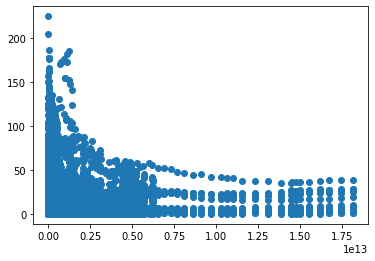

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
 

plt.scatter(X['gdp_for_year'],y)

In [ ]:
m,s=np.mean(y),np.std(y)

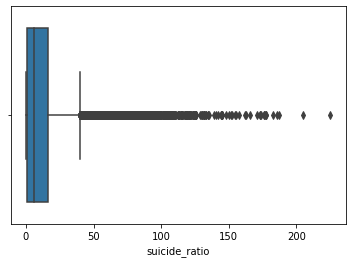

In [ ]:
import seaborn as sns
sns.boxplot(x=y);

In [ ]:
print("mean=",m)
print("std=",s)

mean= 12.816097411933894
std= 18.961170222241854


In [ ]:
cutoff=s*3
lower, upper= m-cutoff, m+cutoff
cutoff

56.88351066672556

In [ ]:
print(lower,upper)

-44.06741325479167 69.69960807865945


In [ ]:
outliers=[x for x in y if (x<lower) or (x>upper)]

In [ ]:
z=[x for x in y if (x>lower) and (x<upper)] 

In [ ]:
X=X[y<69.69]

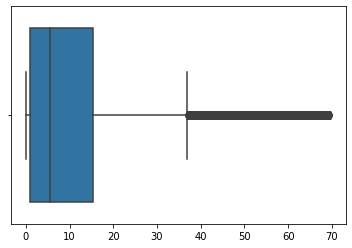

In [ ]:
sns.boxplot(x=z);

In [ ]:
y=np.array(z)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
#X_train
y_train

array([16.45,  1.02,  9.78, ...,  3.29,  1.12, 37.04])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor()
reg.fit(X_train,y_train)
y_pred_test=reg.predict(X_test)
y_pred_train=reg.predict(X_train)


In [ ]:
rms_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
rms_train=np.sqrt(mean_squared_error(y_train,y_pred_train))
#print('RMSE of training set: '+rms_train.astype(str))
print('RMSE of testing set: '+rms_test.astype(str))

RMSE of testing set: 6.501303081851996


In [ ]:
r2_score = reg.score(X_test, y_test)
r2_score

0.7657999892466055

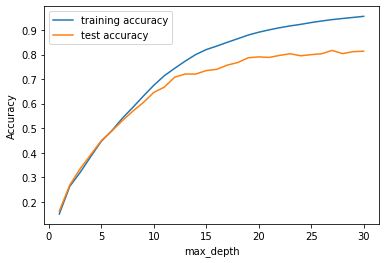

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1, 31)
for n in depth:
    # fit the model
    reg = DecisionTreeRegressor(max_depth=n)
    reg.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(reg.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(reg.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()